# Experimental Lysis Time Data 

## Kannoly, S.; Gao, T.; Dey, S.; Wang, I. N.; Singh, A.; Dennehy, J. J. Optimum threshold minimizes noise in timing of intracellular events. iScience 2020, 23, 101186.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg
import import_ipynb
#from amp_ml_functions import *
from scipy.stats import ks_2samp
from matplotlib.ticker import AutoMinorLocator
from statsmodels.stats.weightstats import ztest as ztest

1.25.2
2.0.3
3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


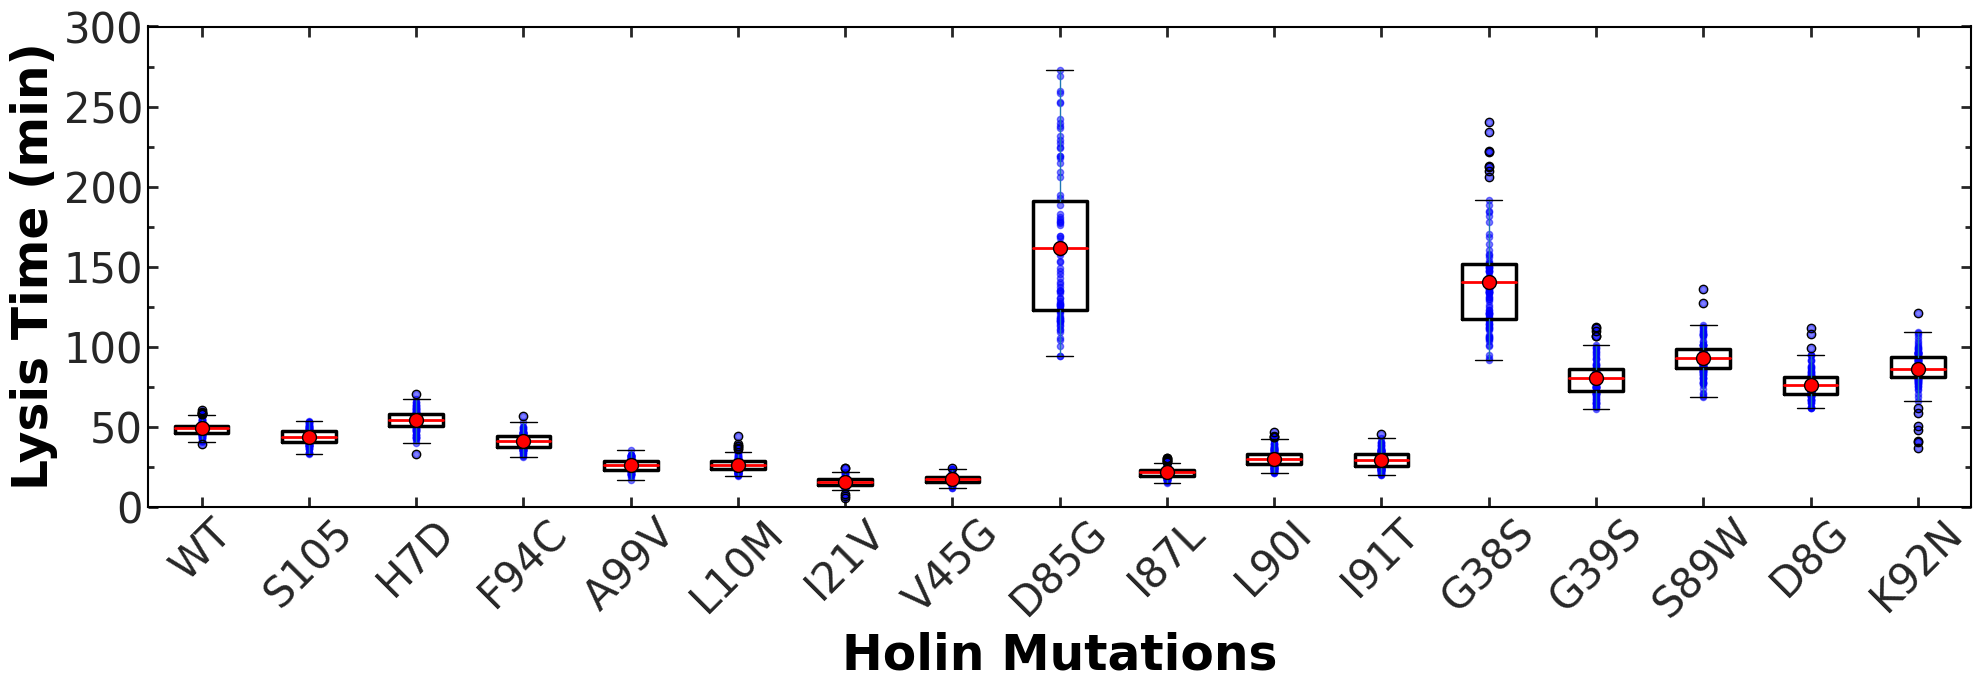

In [30]:
# DataFrame containing lysis time data
df_mfpt = pd.read_excel('Kannoly_time_dist.xlsx')

# Define a dictionary to map original names to corrected names
name_list_corrected = {
    "WT": "WT",
    "S105": "S105",
    "JD246": "H7D",
    "JD248": "F94C",
    "JD251": "A99V",
    "JD253": "L10M",
    "JD388": "L25V/N37H",
    "JD390": "A11G/Y31H",
    "JD391": "A16G/K92Q",
    "JD404": "I21V",
    "JD405": "V45G",
    "JD411": "D85G",
    "JD413": "I87L",
    "JD414": "L90I",
    "JD415": "I91T",
    "JD426": "G38S",
    "JD428": "G39S",
    "JD432": "S89W",
    "JD434": "D8G",
    "JD436": "K92N",
}

# Rename columns according to the dictionary
df_mfpt_renamed = df_mfpt.rename(columns=name_list_corrected)

# Set df to the full DataFrame you want to plot
#df = df_mfpt_renamed

# Exclude specific mutations
mutations_to_exclude = ["L25V/N37H", "A11G/Y31H", "A16G/K92Q"]
df_filtered = df_mfpt_renamed.drop(mutations_to_exclude, axis=1)

# Set df to the excluded DataFrame you want to plot
df = df_filtered

# Create the boxplot with means
plt.figure(figsize=(20, 7))
plt.ylim(0, 300)
plt.yticks([0,50,100,150,200,250,300])
box = df.boxplot(showmeans=True, patch_artist=False, meanprops=dict(marker='o', markerfacecolor='red', markersize=10, markeredgecolor='black'), medianprops=dict(color='none'), boxprops=dict(color='black', linewidth=2.5)) 
plt.xlabel('Holin Mutations', fontsize=35, color='black', fontweight='bold')
plt.ylabel('Lysis Time (min)', fontsize=35, color='black', fontweight='bold')
plt.xticks(rotation=45, ha='center')
# Mirror the x-ticks and y-ticks
plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=30, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=30, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=30, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=30, width=2, length=4)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(1))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))

plt.grid(False)
plt.tight_layout()

# Add data points inside the boxes
for i, col in enumerate(df.columns):
    y = df[col]
    x = [i + 1] * len(y)  # Generating x coordinates for each mutant
    plt.scatter(x, y, alpha=0.5, marker='o', color='blue', edgecolor='blue', s=20)
    
# Adding red lines at the mean value of each box
means = df.mean()
positions = range(1, len(means) + 1)
for i, mean in zip(positions, means):
    plt.plot([i - 0.25, i + 0.25], [mean, mean], color='red', linestyle='-', linewidth=2)

plt.show()


# Distribution of lysis times for each holin mutation

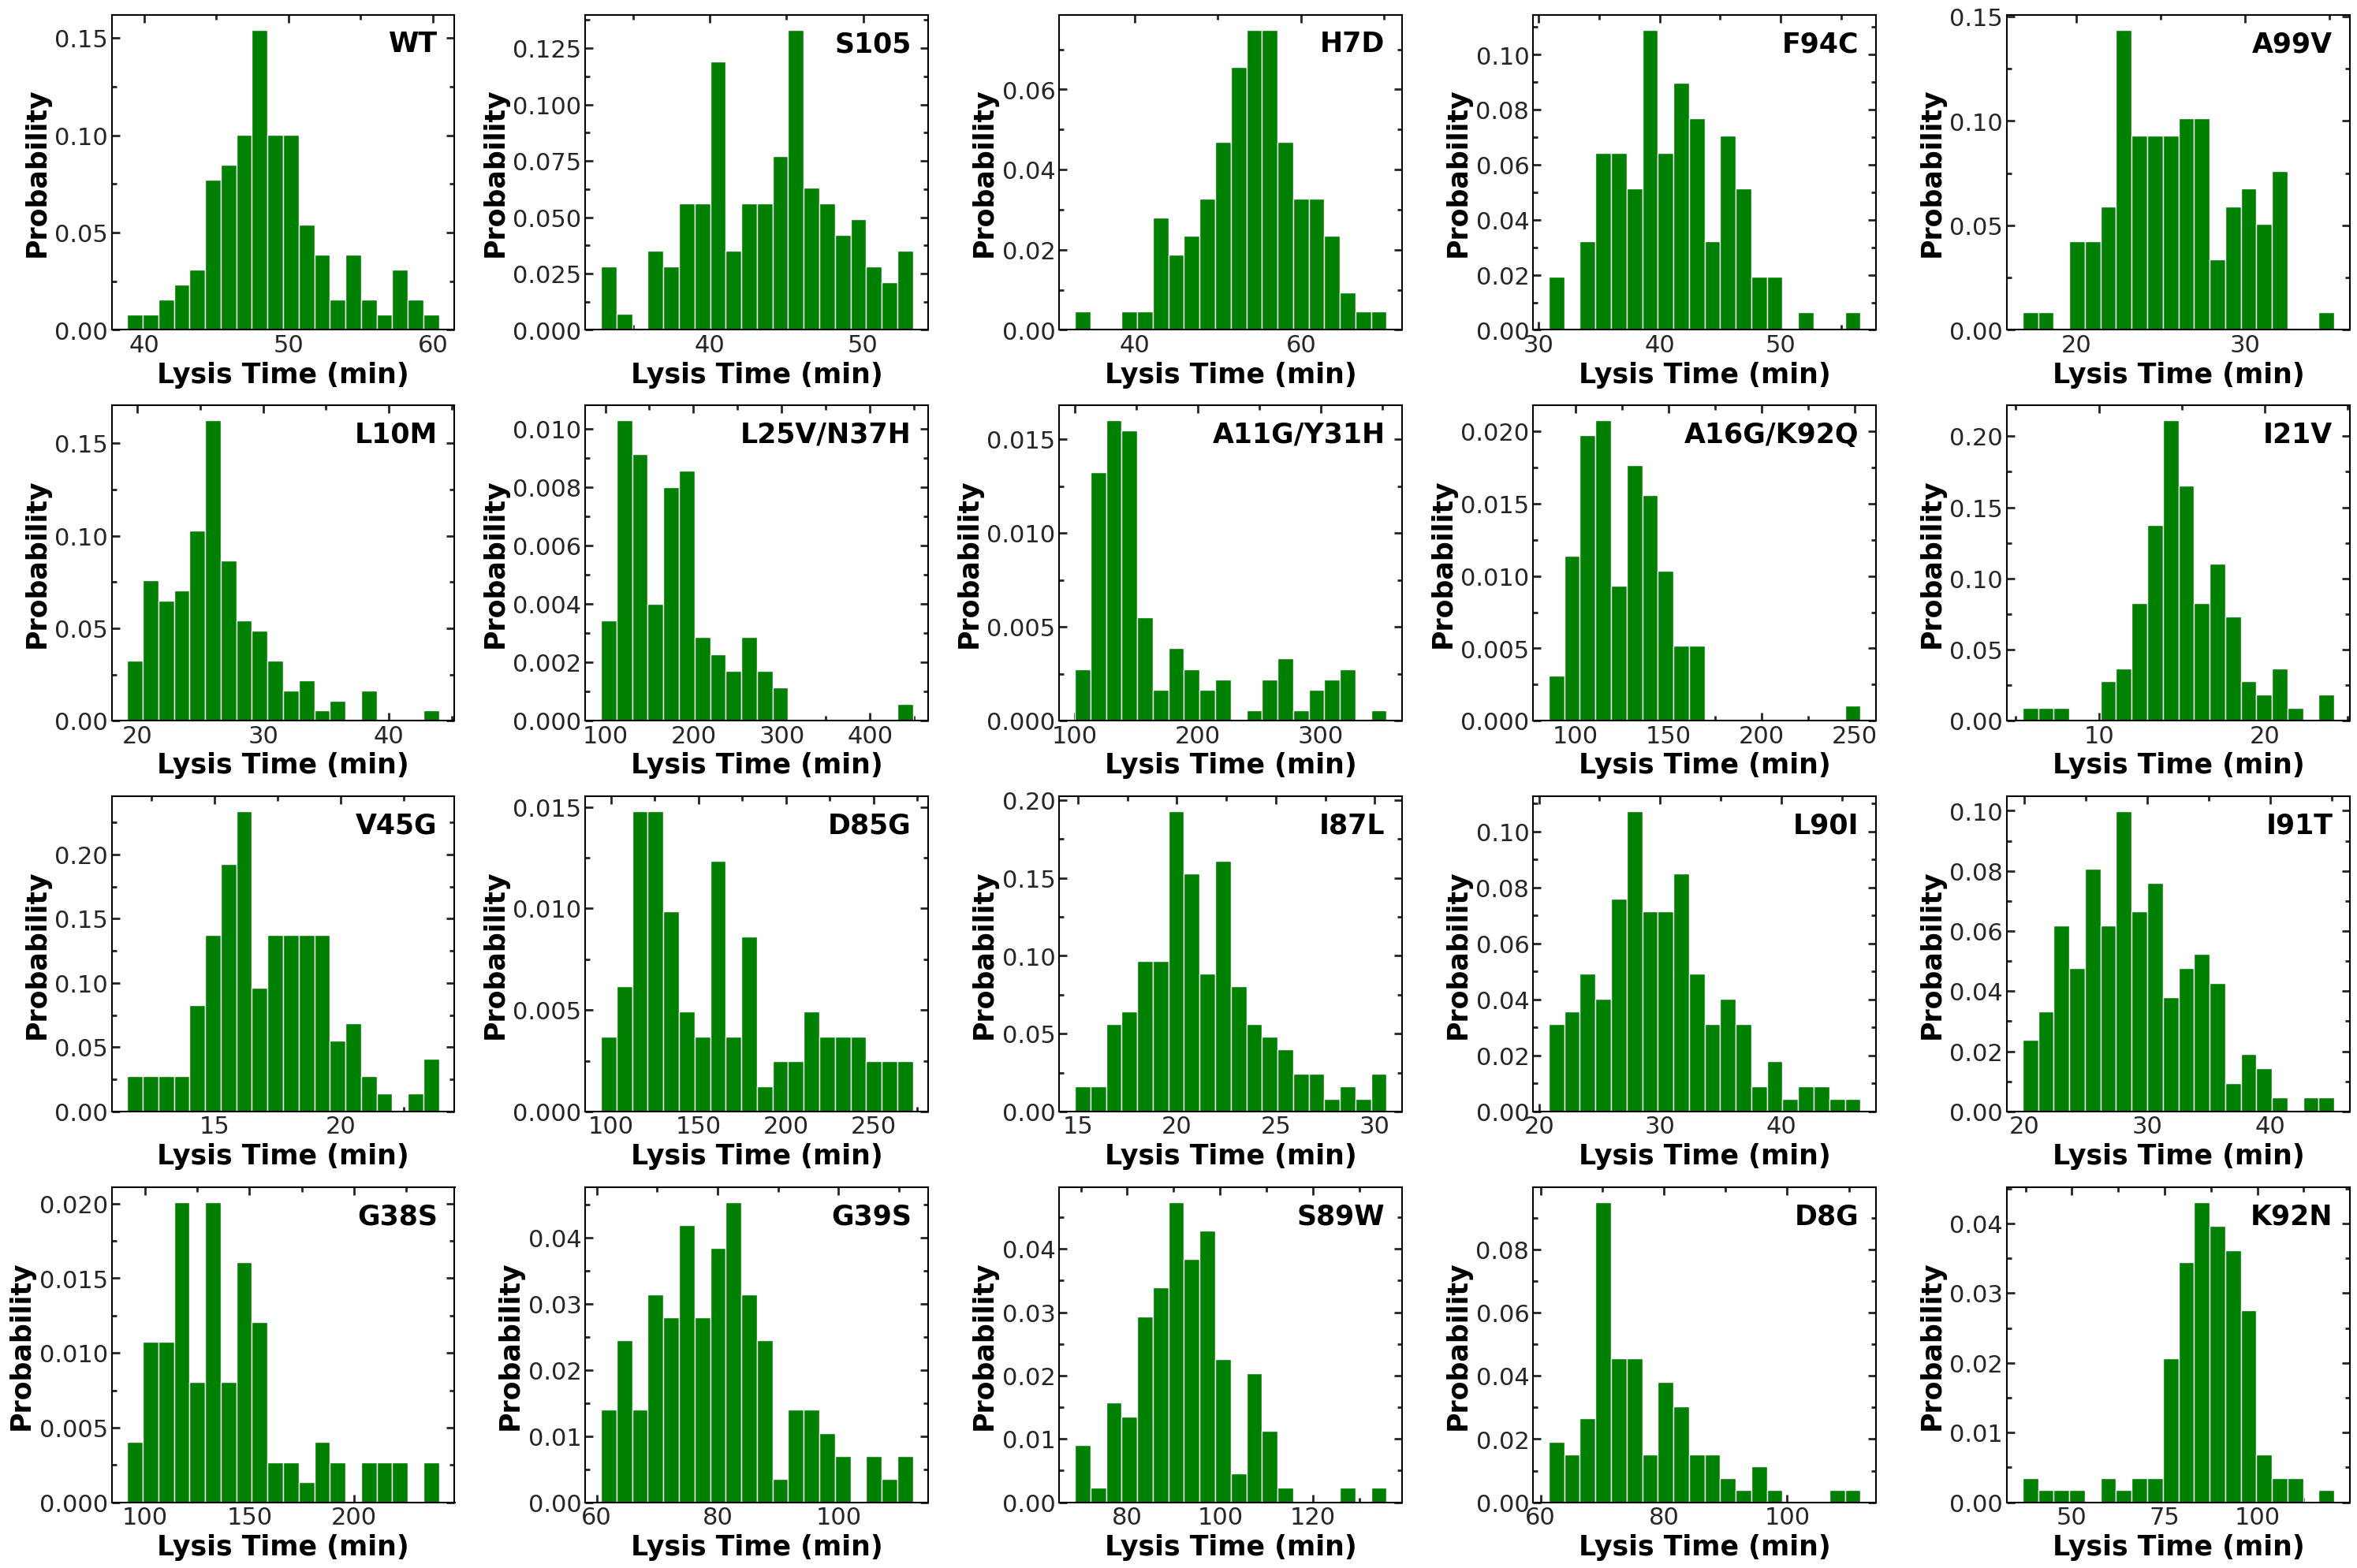

In [32]:
df_mfpt = pd.read_excel('Kannoly_time_dist.xlsx')

# Define a dictionary to map original names to corrected names
name_list_corrected = {
    "WT": "WT",
    "S105": "S105",
    "JD246": "H7D",
    "JD248": "F94C",
    "JD251": "A99V",
    "JD253": "L10M",
    "JD388": "L25V/N37H",
    "JD390": "A11G/Y31H",
    "JD391": "A16G/K92Q",
    "JD404": "I21V",
    "JD405": "V45G",
    "JD411": "D85G",
    "JD413": "I87L",
    "JD414": "L90I",
    "JD415": "I91T",
    "JD426": "G38S",
    "JD428": "G39S",
    "JD432": "S89W",
    "JD434": "D8G",
    "JD436": "K92N",
}

# Rename columns according to the dictionary
df_mfpt_renamed = df_mfpt.rename(columns=name_list_corrected)

# Set df to the full DataFrame you want to plot
df = df_mfpt_renamed

# Create subplots for each mutant
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30, 20), sharex=False, sharey=False)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each mutant's lysis time distribution
for i, (mutant, data) in enumerate(df.items()):
    ax = axes[i]
    ax.hist(data, bins=20, density=True, color='green', alpha=1)
    ax.set_xlabel('Lysis Time (min)', fontsize=25, color='black', fontweight='bold')
    ax.set_ylabel('Probability', fontsize=25, color='black', fontweight='bold')
    ax.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
    ax.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
    ax.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
    ax.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.grid(False)
    
    # Write mutant name in the upper right corner of the plot
    ax.text(0.95, 0.95, mutant, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes,
            fontsize=25, color='black', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=1.5
plt.show()
